# Extract Annotations from Whole Slide Image

Click to open in:  \[[GitHub](https://github.com/DIDSR/wsi_processing_toolbox/02_annotation_extraction.ipynb)\]

Developer: Seyed.kahaki@fda.hhs.gov

## Annotation Extraction Demo

This demonstration guides you through the process extracting image regions from the WSI. We achieve this through using WSIToolbox's Annotation Extractor class. This demonstration should provide you with the instruction to use WSIToolbox for extracting annotations and the annotation masks.

## Environment Configuration

Please follow the instruction provided in the Installation section to install related dependencies. If this isn't your first time running this code and you have all these packages installed, you can skip to the next step. If you choose to run it regardless, you might encounter an error message; however, this won't negatively impact your session. On Jupyter Notebook, this cell is responsible for installing required packages for wsi_reader module.

In [11]:
# to check the python version
from platform import python_version
print(python_version())
#pip install mpmath==1.2.1
#pip install "lxml>=5.2"

print("Installation is done.")

3.12.7
Installation is done.


If you haven’t installed the packages based on the instruction provided for the WSI Reader module, please install these packages as well

In [12]:
# !apt-get -y install libopenjp2-7-dev libopenjp2-tools openslide-tools | tail --line 1
#pip install opencv-python
#pip install openslide-python==1.1.2
#pip install Shapely==1.7.1
#pip install  tifffile==2022.10.10
#pip install random
#pip install glob
#pip install scikit-image
print("Installation is done.")
import cv2

Installation is done.


Note: if you get an error related to openCV, please re-install it using the following commands:

In [13]:
# pip3 uninstall opencv-python-headless
# pip3 install opencv-python-headless

## Cleaning up residual files from prior sessions

The following cell will delete the output directory (for example: C:/Users/data), assuming it exists due to an earlier run of this notebook. If this is your initial run, you can disregard this step.

In [14]:
#![ -d 'C:/Users/data' ] && ( echo "deleting tmp directory"; rm -rf 'C:/Users/data' )

## Loading Required Packages

In this step, we will import several Python modules that are needed for our analysis.

In [15]:
from WSI.annotation import AnnotationExtractor 
import os

## Read Whole Slide Image and XML files

In this section, we read WSIs and XML files from a given directory and create a list for further processing. Please note that for each WSI file, there should be an XML file containing annotations with the same filename as the WSI filename. For example: Aperio1.svs and Aperio1.xml. In this part, you will also enter and set the output directory which the extracted annotation will be stored.  

In [16]:
dir_file =input("Please enter the file directory, for example: ./data/: ") or "./data/"

wsis=[]
xmls=[]

files = os.listdir(dir_file)

for i in files :
    
    #extract all wsi files and xml files
    if i.endswith(".svs")==True :
        if os.path.exists(os.path.join(dir_file, i[:-4])+".xml"):
            wsis.append(i)
            xmls.append(i[:-4]+".xml")
        

WSIs_ = [os.path.join(dir_file,f) for f in wsis]
XMLs_ = [os.path.join(dir_file,f) for f in xmls]
print(WSIs_,XMLs_)

save_dir =input("Please enter the output directory, for example ./data/images/: ") or "./data/images/"

Please enter the file directory, for example: ./data/:  ./data/


['./data/CMU-1-Small-Region.svs'] ['./data/CMU-1-Small-Region.xml']


Please enter the output directory, for example ./data/images/:  ./data/images


## Extracting Annotation

In this section, we will use the extract_ann method of the AnnotationExtractor class to extract the annotations. First, we need to define an object from the AnnotationExtractor class, and call the extract_ann method. There are three inputs required to call the extract_ann method which are, <save directory>, <a variable with list of XMLs>, and <a variable with list of WSIs>. These variables are defined in the previous section (Read Whole Slide Image and XML files). Now, lets call the method and extract annotations. This can be done using the following code. The code will extract the annotations and save them in the defined directory. You will also see the list of extracted annotations with their corresponding IDs in the output section.

In [17]:

ann = AnnotationExtractor()

#Extracting all annotations and save them in the save directory.

ann.extract_ann (save_dir ,XMLs_ , WSIs_) 

there are  1 Regions in this annotation
opening: a region of ./data/CMU-1-Small-Region.svs

 Region numer  0
....poly
saved <region> of annotationID : 1


## Extracting Annotation and Visualize

You also can set the visualization parameter to “True” in order to extract the annotations and visualize the results. You can run the following code to extract annotations.

there are  1 Regions in this annotation
opening: a region of ./data/CMU-1-Small-Region.svs

 Region numer  0
....poly
saved <region> of annotationID : 1


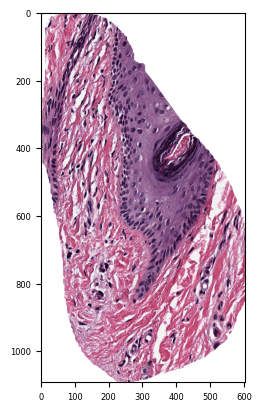

In [18]:
ann = AnnotationExtractor()
Visualization = True

#Extracting all annotations and save them in the save directory and plotting them.

ann.extract_ann (save_dir ,XMLs_ , WSIs_,Visualization)

## Extracting Annotation and Mask

The extract_ann method of the AnnotationExtractor class allows you to extract both annotations and the mask at the same time and save them into the save directory as specified earlier. For this goal, you can run the following code and setting the save_mask parameter to “True” as follows. 

there are  1 Regions in this annotation
opening: a region of ./data/CMU-1-Small-Region.svs

 Region numer  0
....poly
saved <region> of annotationID : 1


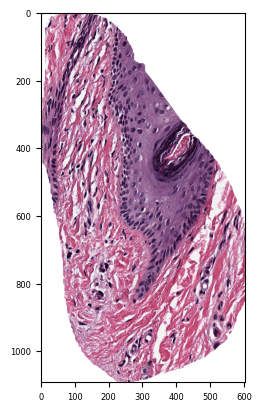

In [19]:
ann = AnnotationExtractor()
Visualization = True
save_mask = False

#Extracting all annotations and their mask save them in the save directory and plotting.

ann.extract_ann (save_dir ,XMLs_ , WSIs_,Visualization,save_mask) 

In [20]:
print("Done!")

Done!
